In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')

In [38]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [62]:
X  = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values

In [63]:
X ##이런 식으로 만들어줘야 한다. 


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [41]:
'''from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3)'''


'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3)'

In [42]:
##Feature Scailing
'''from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)'

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
##Fitting the Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)



In [45]:
X_poly ## Automatically create column of ones!

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [46]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

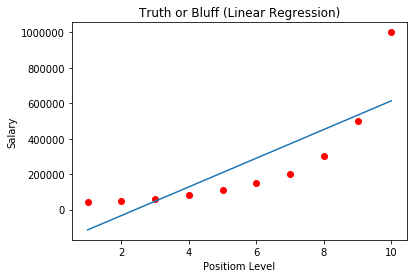

In [47]:
## Visualizing the Linear Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X))
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Positiom Level')
plt.ylabel('Salary')
plt.show()

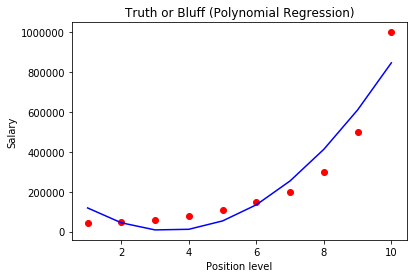

In [48]:
## Visualizing the Linear Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [49]:
## 지금까지는 degree =2, degree를 늘리면 어떻게 될까?

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [50]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

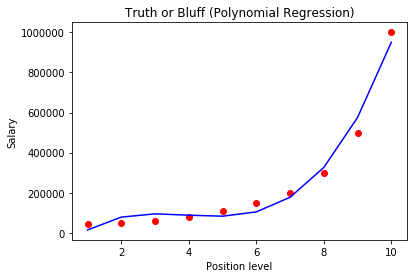

In [51]:
## Visualizing the Linear Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() ##뭔가 더 유연해진다.

In [52]:
## 4  degree

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)

In [53]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

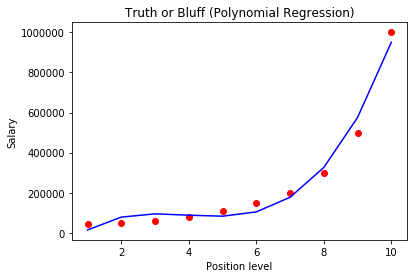

In [54]:
## Visualizing the Linear Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() ##뭔가 더 유연해진다.

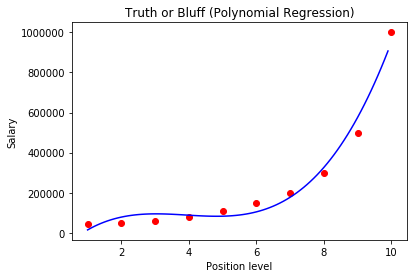

In [55]:
## Visualizing the Polynomail regression results
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)),color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show() ##부드러운 선 위해 넘파이로 X_grid생성

In [79]:
## Predicting a new result woth Linear Regression
X = np.array([6.5])

lin_reg.predict(X.reshape(1,-1)) ##왜 이렇게까지 해야하는거지?

array([330378.78787879])

In [81]:
## Predicting a newresult with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(X.reshape(1,-1)))
##차이가 많이 난다. 

array([133259.46969697])